In [2]:
cd ../Neural Network

d:\JVB\machine-learning\Pytorch\Neural Network


In [3]:
import matplotlib.pyplot as plt
import numpy as np
from data_loader import scaler, X_train, y_train, X_val, y_val, X_test, y_test
from neural_net import NeuralNetwork
from train import train

In [4]:
# Create neural network
net = NeuralNetwork(
    input_dim=784,
    hidden_dims=[10],
    output_dim=10,
    regularization=5e-6,
    learning_rate=1e-3
)

# Train the network
training_costs, val_costs = train(net, X_train, y_train, X_val, y_val, batch_size=200, epochs=200)

# Check the test accuracy
y_test_predicted = net.predict(X_test)
test_acc = (y_test_predicted == y_test).mean()
print(f"Test accuracy: {test_acc:.2f}.")

# Save model
NeuralNetwork.save(net)

---------------------------------------------------------------------------
Epoch 9: average cost 1.66, train accuracy 0.50, val accuracy 0.50.
---------------------------------------------------------------------------
Epoch 19: average cost 1.15, train accuracy 0.65, val accuracy 0.65.
---------------------------------------------------------------------------
Epoch 29: average cost 0.85, train accuracy 0.74, val accuracy 0.75.
---------------------------------------------------------------------------
Epoch 39: average cost 0.70, train accuracy 0.79, val accuracy 0.79.
---------------------------------------------------------------------------
Epoch 49: average cost 0.61, train accuracy 0.82, val accuracy 0.82.
---------------------------------------------------------------------------
Epoch 59: average cost 0.55, train accuracy 0.84, val accuracy 0.84.
---------------------------------------------------------------------------
Epoch 69: average cost 0.51, train accuracy 0.85, val a

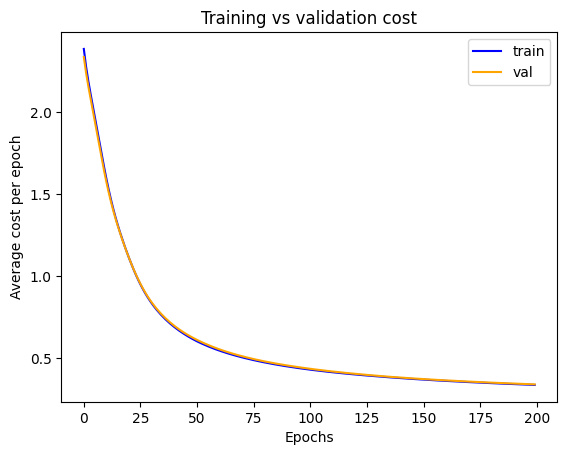

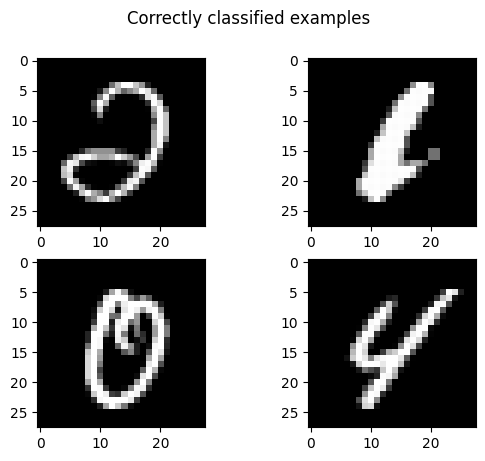

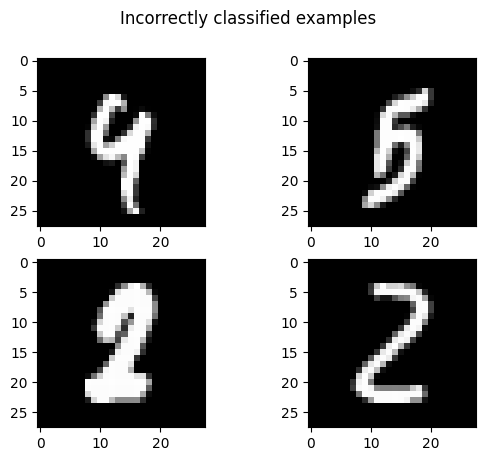

In [7]:
# Render the cost
fig, ax = plt.subplots()
ax.plot(training_costs, color="blue", label="train")
ax.plot(val_costs, color="orange", label="val")
ax.set_xlabel("Epochs")
ax.set_ylabel("Average cost per epoch")
ax.set_title("Training vs validation cost")
plt.legend()
plt.show()

# Display the correctly classified examples
correct_examples = X_test[y_test == y_test_predicted]
correctly_classified = scaler.inverse_transform(correct_examples[np.random.randint(correct_examples.shape[0], size=4), :])
plt.subplot(221)
plt.imshow(correctly_classified[0].reshape(28, 28), cmap='gray')
plt.subplot(222)
plt.imshow(correctly_classified[1].reshape(28, 28), cmap='gray')
plt.subplot(223)
plt.imshow(correctly_classified[2].reshape(28, 28), cmap='gray')
plt.subplot(224)
plt.imshow(correctly_classified[3].reshape(28, 28), cmap='gray')
plt.suptitle("Correctly classified examples")
plt.show()

# Display the incorrect classified examples
incorrect_examples = X_test[y_test != y_test_predicted]
incorrectly_classified = scaler.inverse_transform(incorrect_examples[np.random.randint(incorrect_examples.shape[0], size=4), :])
plt.subplot(221)
plt.imshow(incorrectly_classified[0].reshape(28, 28), cmap='gray')
plt.subplot(222)
plt.imshow(incorrectly_classified[1].reshape(28, 28), cmap='gray')
plt.subplot(223)
plt.imshow(incorrectly_classified[2].reshape(28, 28), cmap='gray')
plt.subplot(224)
plt.imshow(incorrectly_classified[3].reshape(28, 28), cmap='gray')
plt.suptitle("Incorrectly classified examples")
plt.show()